In [2]:
#Importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load first dataset to do the analysis as mentioned in requirements

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',1000)
url = r'C:\Users\vpapn\Documents\mydocs\Assignment\GDP analysis\data1_a.csv'
states_yearly_gdp=pd.read_json(url)
df_states_yearly_gdp=pd.DataFrame(states_yearly_gdp)

#Finding shape, number of columns and number of rows, Number of NULL values in a row and column
print('Shape of Dataframe is: ', df_states_yearly_gdp.shape)
print('\nMeta data of provided dataset: \n',df_states_yearly_gdp.dtypes)
print('\nSample records of dataset:\n', df_states_yearly_gdp)


Shape of Dataframe is:  (12, 36)

Meta data of provided dataset: 
 All_India GDP                float64
Andaman & Nicobar Islands     object
Andhra Pradesh               float64
Arunachal Pradesh             object
Assam                         object
Bihar                         object
Chandigarh                    object
Chhattisgarh                 float64
Delhi                        float64
Duration                      object
Goa                           object
Gujarat                       object
Haryana                      float64
Himachal Pradesh              object
Items  Description            object
Jammu & Kashmir               object
Jharkhand                     object
Karnataka                     object
Kerala                        object
Madhya Pradesh               float64
Maharashtra                   object
Manipur                       object
Meghalaya                    float64
Mizoram                       object
Nagaland                      object
Odisha  

In [4]:
#Checking NUll count/percentage in each row and each column
print('NULL count for each row:\n',df_states_yearly_gdp.isna().sum(axis=1))
print('\nNULL percentage for each column:\n',df_states_yearly_gdp.isna().sum(axis=0)/len(df_states_yearly_gdp) * 100)

NULL count for each row:
 0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11    36
dtype: int64

NULL percentage for each column:
 All_India GDP                8.333333
Andaman & Nicobar Islands    8.333333
Andhra Pradesh               8.333333
Arunachal Pradesh            8.333333
Assam                        8.333333
Bihar                        8.333333
Chandigarh                   8.333333
Chhattisgarh                 8.333333
Delhi                        8.333333
Duration                     8.333333
Goa                          8.333333
Gujarat                      8.333333
Haryana                      8.333333
Himachal Pradesh             8.333333
Items  Description           8.333333
Jammu & Kashmir              8.333333
Jharkhand                    8.333333
Karnataka                    8.333333
Kerala                       8.333333
Madhya Pradesh               8.333333
Maharashtra                  8.333333
Manipur             

# Findings:

    1. Total Rows - 12
    2. Total Columns - 36
    3. Provided Datatset provides information of GDP of various states (i.e. GSDP) from Year 2011 to 2016.
    4. After checking data, I found that all of the fields are either float or Date or Object(only 1 column - Item Description),
        But they all have been imported with Object/float datatype.
    5. After checking sum of NULL values, I found that NA has provided as a string i.e.'NA'. So only code is not able 
        calculate actual percentage of missign values.


In [5]:
#To replace string 'NA' to np.NaN
df_states_yearly_gdp = df_states_yearly_gdp.replace('NA',np.NaN)

#Correcting Default datatype of columns

print('Checking if there is any row/colyumn with all NULL')

print(df_states_yearly_gdp.isnull().all(axis=1))
print(df_states_yearly_gdp.isnull().all(axis=0))

Checking if there is any row/colyumn with all NULL
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
dtype: bool
All_India GDP                False
Andaman & Nicobar Islands    False
Andhra Pradesh               False
Arunachal Pradesh            False
Assam                        False
Bihar                        False
Chandigarh                   False
Chhattisgarh                 False
Delhi                        False
Duration                     False
Goa                          False
Gujarat                      False
Haryana                      False
Himachal Pradesh             False
Items  Description           False
Jammu & Kashmir              False
Jharkhand                    False
Karnataka                    False
Kerala                       False
Madhya Pradesh               False
Maharashtra                  False
Manipur                      False
Meghalaya              

# Findings:

I found that Column 'West Bengal1' has all NULLs and 11th row has all NULLs.
lets remove them.

In [6]:
#Dropping rows and columns where it contains all NULLs.

df_states_yearly_gdp = df_states_yearly_gdp.dropna(how='all',axis=0) 
df_states_yearly_gdp = df_states_yearly_gdp.dropna(how='all',axis=1) 
print('new shape of the dataframe is:\n', df_states_yearly_gdp.shape)

new shape of the dataframe is:
 (11, 35)


In [7]:
#As per my understanding, all GDP fields should be of float datatype. So changing datatypes of all GDP fields
df_states_yearly_gdp[df_states_yearly_gdp.columns.difference(['Duration', 'Items  Description'])]= df_states_yearly_gdp[df_states_yearly_gdp.columns.difference(['Duration', 'Items  Description'])].apply(pd.to_numeric)
print(df_states_yearly_gdp.dtypes)


All_India GDP                float64
Andaman & Nicobar Islands    float64
Andhra Pradesh               float64
Arunachal Pradesh            float64
Assam                        float64
Bihar                        float64
Chandigarh                   float64
Chhattisgarh                 float64
Delhi                        float64
Duration                      object
Goa                          float64
Gujarat                      float64
Haryana                      float64
Himachal Pradesh             float64
Items  Description            object
Jammu & Kashmir              float64
Jharkhand                    float64
Karnataka                    float64
Kerala                       float64
Madhya Pradesh               float64
Maharashtra                  float64
Manipur                      float64
Meghalaya                    float64
Mizoram                      float64
Nagaland                     float64
Odisha                       float64
Puducherry                   float64
P

# Task1: 

Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17

In [8]:
df_states_yearly_gdp = df_states_yearly_gdp[~(((df_states_yearly_gdp['Items  Description'] == '(% Growth over previous year)') | (df_states_yearly_gdp['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)')) & (df_states_yearly_gdp['Duration']=='2016-17'))]
print('New shape of the dataset is:\n',df_states_yearly_gdp.shape)

New shape of the dataset is:
 (9, 35)


In [9]:
print(df_states_yearly_gdp) #Priting dataset to have a look at clean data

   All_India GDP  Andaman & Nicobar Islands  Andhra Pradesh   \
0     8736039.00                    3979.00        379402.00   
1     9946636.00                    4421.00        411404.00   
2    11236635.00                    5159.00        464272.00   
3    12433749.00                    5721.00        526468.00   
4    13675331.00                        NaN        609934.00   
6          13.86                      11.13             8.43   
7          12.97                      16.68            12.85   
8          10.65                      10.89            13.40   
9           9.99                        NaN            15.85   

   Arunachal Pradesh      Assam      Bihar  Chandigarh  Chhattisgarh  \
0           11063.00  143175.00  247144.00    18768.00     158074.00   
1           12547.00  156864.00  282368.00    21609.00     177511.00   
2           14602.00  177745.00  317101.00    24787.00     206690.00   
3           16761.00  198098.00  373920.00    27844.00     234982.00   

# Task2:
Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states.

Keeping only records where Items Descrption is equal to '(% Growth over previous year)' and changing the index to get mean of GDP columns as mentioned in Task2.

In [11]:
df_perc_growth = df_states_yearly_gdp.loc[(df_states_yearly_gdp['Items  Description'] == '(% Growth over previous year)') & ((df_states_yearly_gdp['Duration']=='2013-14') | (df_states_yearly_gdp['Duration']=='2014-15') | (df_states_yearly_gdp['Duration']=='2015-16') | (df_states_yearly_gdp['Duration']=='2012-13'))]
df_perc_growth.drop(['Items  Description'], axis=1, inplace=True)
df_perc_growth = df_perc_growth.set_index('Duration')
print(df_perc_growth.head())

          All_India GDP  Andaman & Nicobar Islands  Andhra Pradesh   \
Duration                                                              
2012-13           13.86                      11.13             8.43   
2013-14           12.97                      16.68            12.85   
2014-15           10.65                      10.89            13.40   
2015-16            9.99                        NaN            15.85   

          Arunachal Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Duration                                                                     
2012-13               13.41   9.56  14.25       15.14         12.30  13.81   
2013-14               16.38  13.31  12.30       14.71         16.44  13.43   
2014-15               14.79  11.45  17.92       12.33         13.69  10.96   
2015-16               12.07  13.19  10.59        8.84         10.98  12.09   

            Goa  Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  \
Duration                        

# Findings:

I see that most of the state's GDP data is missing for Year 2015-16. If we go ahead after dropping these NA values, 
those states will no longer be a part of our analysis which is wrong.
 So replacing NA with mean of previous year values of that state.

In [13]:
df_perc_growth_t = df_perc_growth.copy() #First, lets take a backup of the dataset

from sklearn.preprocessing import Imputer
col_name = list(df_perc_growth_t.columns.values)
index_names = list(df_perc_growth_t.index.values)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_perc_growth_t)
list_perc_growth_t= imp.transform(df_perc_growth_t)

#Creating the Dataframe and providing columns and index values
df_perc_growth_t = pd.DataFrame.from_records(list_perc_growth_t,columns = col_name, index=index_names)
print(df_perc_growth_t)

         All_India GDP  Andaman & Nicobar Islands  Andhra Pradesh   \
2012-13          13.86                      11.13             8.43   
2013-14          12.97                      16.68            12.85   
2014-15          10.65                      10.89            13.40   
2015-16           9.99                      12.90            15.85   

         Arunachal Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
2012-13              13.41   9.56  14.25       15.14         12.30  13.81   
2013-14              16.38  13.31  12.30       14.71         16.44  13.43   
2014-15              14.79  11.45  17.92       12.33         13.69  10.96   
2015-16              12.07  13.19  10.59        8.84         10.98  12.09   

           Goa  Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  \
2012-13 -10.02    17.69    16.63         13.890000            11.31   
2013-14  -5.77    11.47    15.45         14.420000            10.09   
2014-15  13.12    10.82     9.18         10.140000

C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
#National Average of India
#national_avg = df_states_yearly_gdp.loc[((df_perc_growth_t['Duration']=='2013-14') | (df_perc_growth_t['Duration']=='2014-15') | (df_perc_growth_t['Duration']=='2015-16') )]['All_India GDP'].mean()
national_avg = df_perc_growth_t.loc[['2013-14','2014-15', '2015-16']]['All_India GDP'].mean()

print('Nation Average of India: ', national_avg)

Nation Average of India:  11.203333333333333


Mean Average GDP Growth of states:
 Mizoram                      17.422222
Tripura                      16.557778
Nagaland                     16.261111
Arunachal Pradesh            14.413333
Karnataka                    14.120000
Andhra Pradesh               14.033333
Manipur                      13.703333
Chhattisgarh                 13.703333
Bihar                        13.603333
Andaman & Nicobar Islands    13.490000
Telangana                    12.763333
Assam                        12.650000
Madhya Pradesh               12.626667
Kerala                       12.583333
Himachal Pradesh             12.458889
Tamil Nadu                   12.336667
Delhi                        12.160000
Puducherry                   12.053333
Chandigarh                   11.960000
Uttar Pradesh                11.940000
Haryana                      11.846667
Uttarakhand                  11.803333
Maharashtra                  11.541111
Rajasthan                    11.526667
Jharkhand                   

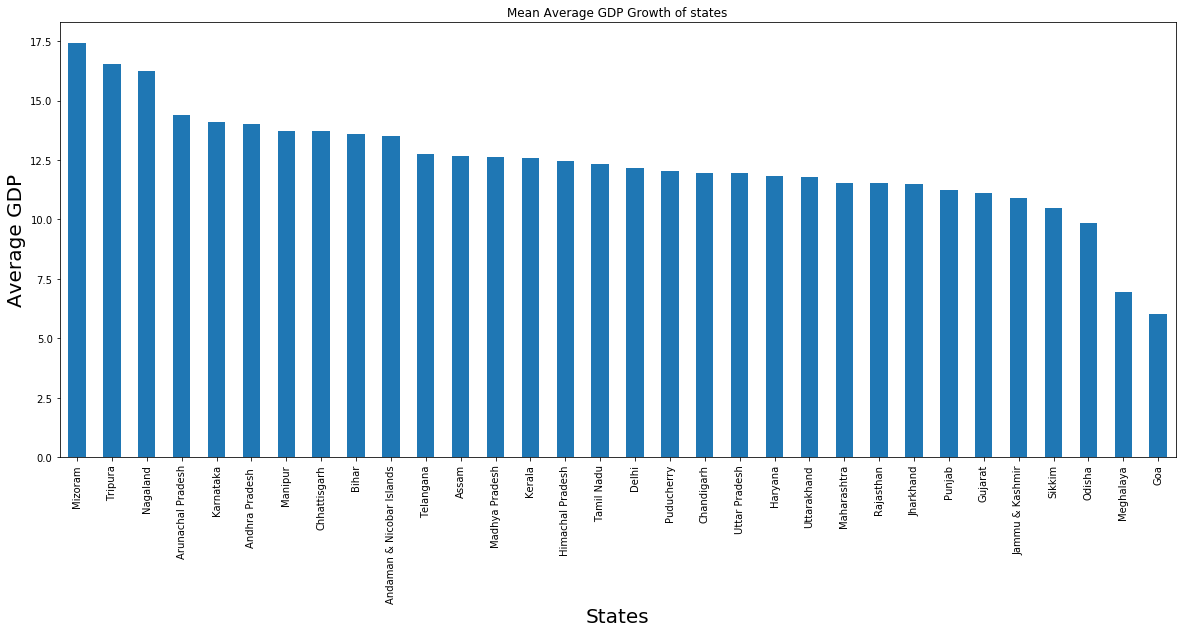

In [15]:
#Calculating Average Growth of states for the duration 2013-14, 2014-15 and 2015-16
df_perc_growth_t.drop('All_India GDP',axis=1,inplace=True)
avg_growth_of_states = df_perc_growth_t.loc[['2013-14','2014-15','2015-16']].mean(axis=0).sort_values(ascending=False)
print('Mean Average GDP Growth of states:\n',avg_growth_of_states)

#Task2 - Plot the average growth of states for the duration 2013-14, 2014-15 and 2015-16
avg_growth_of_states.plot(kind='bar', figsize=(20,8), title='Mean Average GDP Growth of states')
plt.xlabel('States', fontsize=20)
plt.ylabel('Average GDP', fontsize=20)
plt.show()

# Task:
Which states have been growing consistently fast, and which ones have been struggling?

In [16]:
print('Consistently Fast Growing States are: ', ', '.join(list(avg_growth_of_states.head(5).index)))
print('Struggling States are: ', ', '.join(list(avg_growth_of_states.tail(5).index)))

Consistently Fast Growing States are:  Mizoram, Tripura, Nagaland, Arunachal Pradesh, Karnataka
Struggling States are:  Jammu & Kashmir, Sikkim, Odisha, Meghalaya, Goa


# Result:
1a) States which have been growing consistently fast - 
    1. Mijoram
    2. Tripura
    3. Nagaland
    4. Arunachal Pradesh
    5. Karnataka
 
1b) States which have been struggling:
    1. Goa
    2. Meghalya
    3. Odisha
    4. Sikkim
    5. Jammu & Kashmir
    
2) Curiosity exercise: Average Growth Rate of my hometown [Haryana] : 11.85
    which is more than National Average of India i.e 11.2

# Out of my curiosity:
    Now lets find out average growth of each state for duration 2013-14, 2014-15 and 2015-16

In [17]:
df_perc_growth_t = df_perc_growth.T
df_perc_growth_t['avg_growth_2013_14'] = (df_perc_growth_t['2013-14'] + df_perc_growth_t['2012-13'])/2
df_perc_growth_t['avg_growth_2014_15'] = (df_perc_growth_t['2014-15'] + df_perc_growth_t['2013-14'])/2
df_perc_growth_t['avg_growth_2015_16'] = (df_perc_growth_t['2015-16'] - df_perc_growth_t['2014-15'])/2
print(df_perc_growth_t)

Duration                   2012-13  2013-14  2014-15  2015-16  \
All_India GDP                13.86    12.97    10.65     9.99   
Andaman & Nicobar Islands    11.13    16.68    10.89      NaN   
Andhra Pradesh                8.43    12.85    13.40    15.85   
Arunachal Pradesh            13.41    16.38    14.79    12.07   
Assam                         9.56    13.31    11.45    13.19   
Bihar                        14.25    12.30    17.92    10.59   
Chandigarh                   15.14    14.71    12.33     8.84   
Chhattisgarh                 12.30    16.44    13.69    10.98   
Delhi                        13.81    13.43    10.96    12.09   
Goa                         -10.02    -5.77    13.12    10.75   
Gujarat                      17.69    11.47    10.82    11.09   
Haryana                      16.63    15.45     9.18    10.91   
Himachal Pradesh             13.89    14.42    10.14      NaN   
Jammu & Kashmir              11.31    10.09     4.70    17.91   
Jharkhand                

In [19]:
df_states_avg_growth = df_perc_growth_t[['avg_growth_2013_14', 'avg_growth_2014_15', 'avg_growth_2015_16']]
df_states_avg_growth.drop('All_India GDP',axis=0,inplace=True)
df_states_avg_growth 

Duration,avg_growth_2013_14,avg_growth_2014_15,avg_growth_2015_16
Andaman & Nicobar Islands,13.905,13.785,NaN
Andhra Pradesh,10.640,13.125,1.225
Arunachal Pradesh,14.895,15.585,-1.360
Assam,11.435,12.380,0.870
Bihar,13.275,15.110,-3.665
Chandigarh,14.925,13.520,-1.745
Chhattisgarh,14.370,15.065,-1.355
Delhi,13.620,12.195,0.565
Goa,-7.895,3.675,-1.185
Gujarat,14.580,11.145,0.135


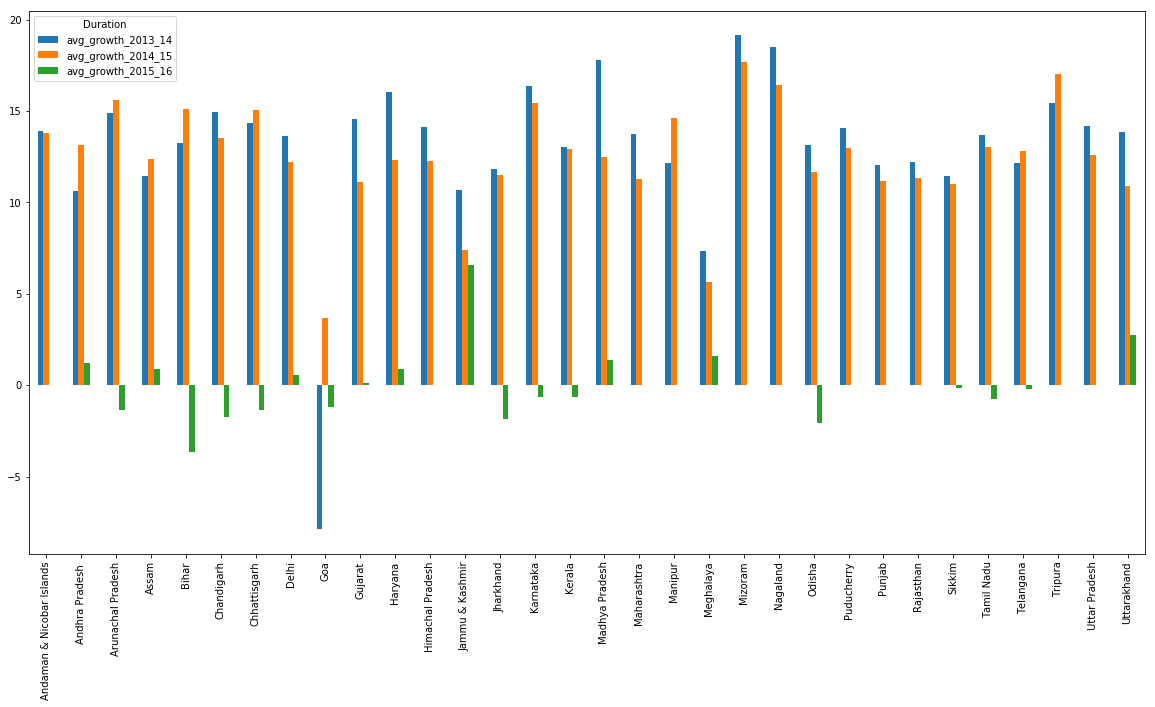

In [20]:

df_states_avg_growth.plot(kind='bar', figsize=(20,10))
plt.show()

# Task3:
Plot the total GDP of the states for the year 2015-16:
    Identify the top 5 and the bottom 5 states based on total GDP.

Total GDP for all states for Year: 2015-16:

 Maharashtra                  1540265.25
Tamil Nadu                   1212668.00
Uttar Pradesh                1153795.00
Karnataka                    1027068.00
Gujarat                       994316.00
Andhra Pradesh                609934.00
Kerala                        588337.00
Telangana                     575631.00
Delhi                         551963.00
Madhya Pradesh                543975.00
Rajasthan                     523091.00
Haryana                       485184.00
Bihar                         413503.00
Odisha                        341887.00
Punjab                        316771.75
Chhattisgarh                  260776.00
Jharkhand                     241955.00
Assam                         224234.00
Uttarakhand                   184091.00
Jammu & Kashmir               118387.00
Himachal Pradesh               88668.25
Goa                            45002.00
Chandigarh                     30304.00
Meghalaya                      267

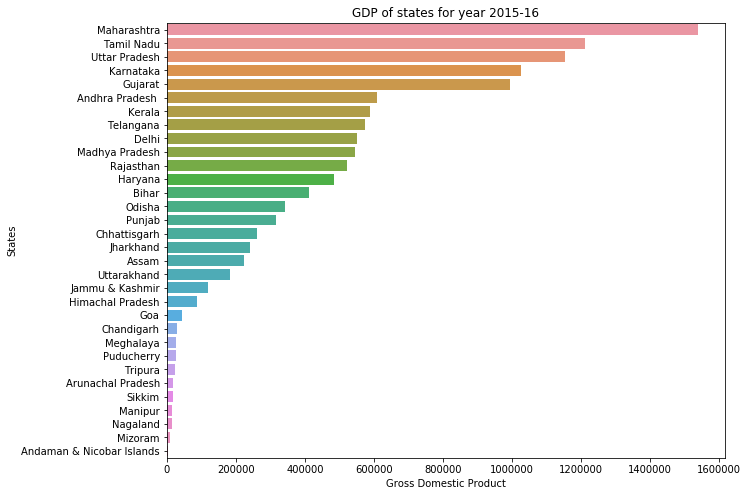

In [22]:
pd.set_option('display.max_columns',500)
df_states_total_gdp_2015_16 = df_states_yearly_gdp.loc[df_states_yearly_gdp['Items  Description'] != '(% Growth over previous year)']
df_states_total_gdp_2015_16.set_index('Duration', inplace=True) #Setting index to Duration

#To keep only those columns which are required.
df_states_total_gdp_2015_16.drop(columns = ['All_India GDP' ,'Items  Description'],inplace=True) 


#As I see many NA values for year 2015-16. So replacing them with mean of that state GDP value. 
#As dropping it or replacing with 0 will not provide correct analysis result.

df_states_total_gdp_2015_16.fillna(df_states_total_gdp_2015_16.mean(),inplace=True) 

#As we need to analyze only for year 2015-16. So filtering rows corresponding to other years.
df_states_total_gdp_2015_16 = df_states_total_gdp_2015_16.loc[['2015-16']]

#Taking GDP of all states for year 2015-16 ans  sorting it in descending order.
GSDP_values = df_states_total_gdp_2015_16.sum().sort_values(ascending=False)
print('Total GDP for all states for Year: 2015-16:\n\n' , GSDP_values)
plt.figure(figsize = (10,8))
sns.barplot(x= GSDP_values.values, y= GSDP_values.index, orient = 'h')
plt.title('GDP of states for year 2015-16')
plt.xlabel('Gross Domestic Product')
plt.ylabel('States')

plt.show()

# Task:
Identify the top 5 and the bottom 5 states based on total GDP.

In [23]:
print('Top 5 states are : '+str(', '.join(list(GSDP_values.head(5).index))))
print('Bottom 5 states are : '+str(', '.join(list(GSDP_values.tail(5).index))))

Top 5 states are : Maharashtra, Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat
Bottom 5 states are : Sikkim, Manipur, Nagaland, Mizoram, Andaman & Nicobar Islands


# Part I-B:

Perform the analysis only for the duration 2014-15


In [24]:
#Import all data files for all states and Union Territories

import glob
dir_path = r'C:\Users\vpapn\Documents\mydocs\Assignment\GDP analysis'
filenames = glob.glob(dir_path+'/NAD-*.csv')
state_list = []
for filename in filenames:
    temp_df = pd.read_csv(filename, encoding='iso-8859-1')
    state = filename.split('\\')[7].split('-')[1]  #fetching state name from file name
    temp_df = temp_df[['S.No.','Item','2014-15']]  #Keeping only columns which are required for our analysis
    
    #Creating a new column - 'State' so that after concating the data of different files, 
    #I am still be able to find which data belong to which state
    
    temp_df['State'] = state  
    
    #Creating a new column - 'Sector' with which I would be able to identify each row corresponding to each sector
    #and initializing i svalue with NA
    temp_df['Sectors'] = np.NaN
    
    #Now to populate Sector information corresponding to each row,
    # I found that whenever there is a row with S.NO.=Total, It is the end row for that sector and sector name is actually 
    #present in column name - Item corresponding to this row.
    #Driving the logic below based on above observation.
    index_list = temp_df.index[temp_df['S.No.']=='Total'].to_list()
    index_list.insert(0,-1)
    
    for i in range(len(index_list)-1):
        start = index_list[i] +1
        stop = index_list[i+1]
        
        temp_df.loc[start:stop,'Sectors']= temp_df.loc[index_list[i+1],'Item']
    
    state_list.append(temp_df)

#As for each sub-sector, there are rows with S.NO. as 1,2,3,... and so on, 
#Also for subsub sector we have another row with S.No. 1.1, 1.2,....,2.1,2.2,2.3,...... etc
#Here as a prt of our analysis, we need to only analyse till sub-sector level and not subsequent detail, 
#so I am dropping sub sub sector details as below

index_to_keep = [str(i) for i in list(range(1,20))]
state_df = pd.concat(state_list)
state_df = state_df[state_df['S.No.'].isin(index_to_keep)]
state_df = state_df.reset_index(drop=False)

#Task : Removing all Union Territories:

state_df = state_df.loc[~state_df['State'].isin(['Delhi', 'Chandigarh','Andaman_and_Nicobar_Islands','Puducherry'])]
state_df['Sectors'].fillna('others',inplace=True)
state_df.drop(['S.No.','index'],axis=1, inplace=True)
state_df.rename(columns={'Item':'Sub-Category'},inplace=True)

print('Sample Records of clean dataset:\n', state_df.head())
print('Shape of dataset is:\n',state_df.shape)
print('Metadata information of dataset is:\n',state_df.info())



Sample Records of clean dataset:
                                         Sub-Category     2014-15  \
0                  Agriculture, forestry and fishing  14819416.0   
1                               Mining and quarrying   1484300.0   
2                                      Manufacturing   4672266.0   
3  Electricity, gas, water supply & other utility...   1151729.0   
4                                       Construction   4664889.0   

            State    Sectors  
0  Andhra_Pradesh    Primary  
1  Andhra_Pradesh    Primary  
2  Andhra_Pradesh  Secondary  
3  Andhra_Pradesh  Secondary  
4  Andhra_Pradesh  Secondary  
Shape of dataset is:
 (466, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 516
Data columns (total 4 columns):
Sub-Category    466 non-null object
2014-15         466 non-null float64
State           466 non-null object
Sectors         466 non-null object
dtypes: float64(1), object(3)
memory usage: 18.2+ KB
Metadata information of dataset is:
 N

In [25]:
#Checking for any NULL values rowwise/column-wise
series = state_df.isna().all(axis=1)
print(state_df[series.values==True])
print(state_df.isna().all(axis=0))

series = state_df.isna().any(axis=1)
print(state_df[series.values==True])

#As from the domain knowledge and google, I found that all nullable fields in various states, actually doesnt 
#contribute much for 
#mentioned categores, SO I am replacing those NAs with 0.


state_df['2014-15'].fillna(0,inplace=True)
print(state_df.isna().any(axis=0))
print(state_df[series.values==True])

Empty DataFrame
Columns: [Sub-Category, 2014-15, State, Sectors]
Index: []
Sub-Category    False
2014-15         False
State           False
Sectors         False
dtype: bool
Empty DataFrame
Columns: [Sub-Category, 2014-15, State, Sectors]
Index: []
Sub-Category    False
2014-15         False
State           False
Sectors         False
dtype: bool
Empty DataFrame
Columns: [Sub-Category, 2014-15, State, Sectors]
Index: []


# Task:
Plot the GDP per capita for all the states.
Identify the top 5 and the bottom 5 states based on the GDP per capita.
Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [26]:
#Fetching only required data which will be useful to do this analysis
df_per_capita_gdp = state_df[(state_df['Sub-Category'] =='Per Capita GSDP (Rs.)')]
#As our index values are shuffled up, resetting index values fter dropping current index values
df_per_capita_gdp = df_per_capita_gdp.reset_index(drop=True)
df_per_capita_gdp = df_per_capita_gdp[['State','2014-15']].sort_values(by='2014-15', ascending=False).reset_index(drop=True)

#Renaming column name to represent correct information
df_per_capita_gdp.rename(columns={'2014-15':'Per Capita GDP'}, inplace=True) 
df_per_capita_gdp

,State,Per Capita GDP
0,Goa,271793.0
1,Sikkim,240274.0
2,Haryana,164077.0
3,Kerala,154778.0
4,Uttarakhand,153076.0
5,Maharashtra,152853.0
6,Himachal_Pradesh,147330.0
7,Tamil_Nadu,146503.0
8,Karnataka,145141.0
9,Gujarat,141263.0


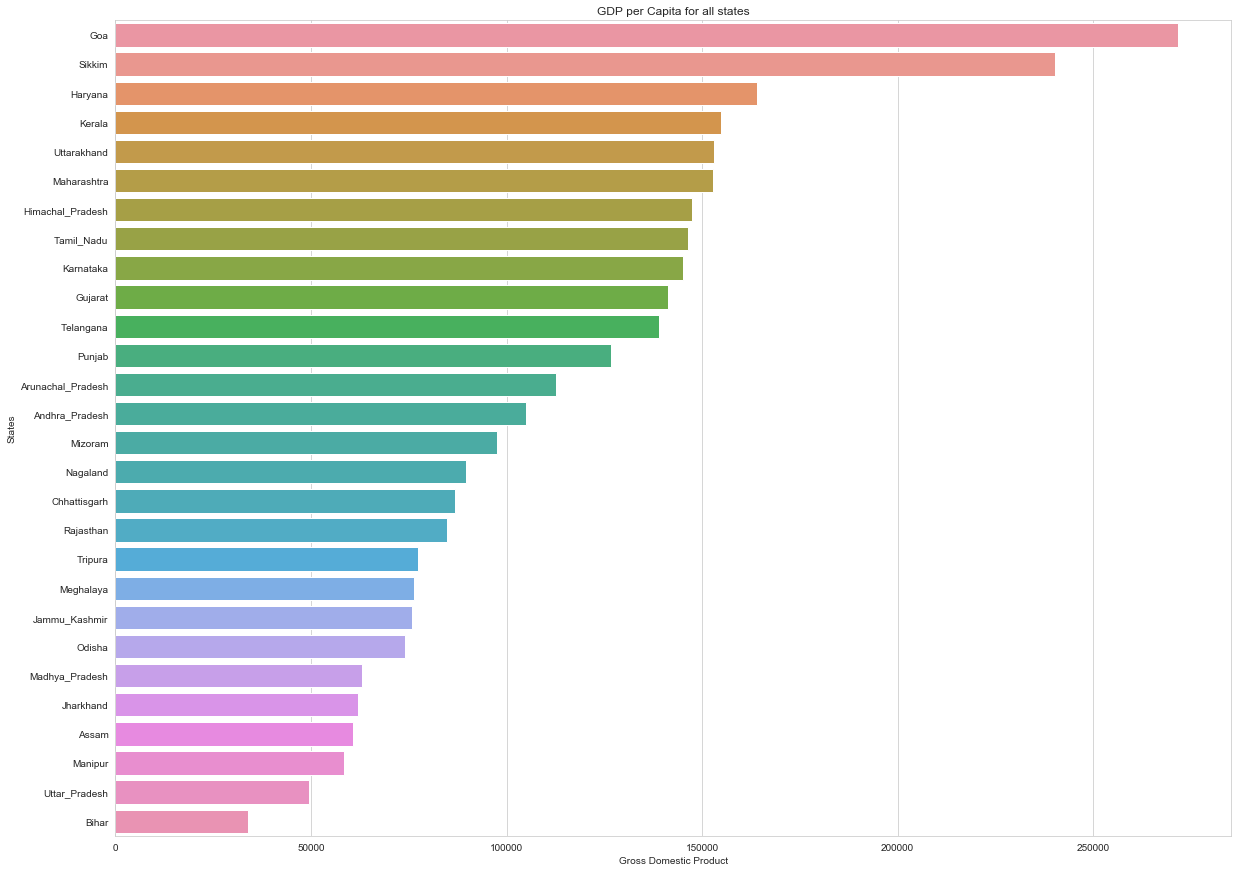

In [27]:
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
sns.barplot(x='Per Capita GDP', y='State', data=df_per_capita_gdp)
plt.title('GDP per Capita for all states')
plt.ylabel('States')
plt.xlabel('Gross Domestic Product')
plt.show()

# Result:
#Top 5 and the bottom 5 states based on the GDP per capita

Top5: Goa, Sikkim, Haryana, Kerla, Uttarakhand

Bottom5: Bihar, Uttar Pradesh, Manipur, Assam, Jharkhand

# Task:
Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [28]:
print('Ratio of Highest Per Capita GDP to Lowest Per Capita GDP:\n', round(df_per_capita_gdp.max()['Per Capita GDP']/df_per_capita_gdp.min()['Per Capita GDP'],2))

Ratio of Highest Per Capita GDP to Lowest Per Capita GDP:
 8.0


# Task:
Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [29]:
df_category_contribution = state_df.copy() #creating a backup of master dataframe
data_state_cc = df_category_contribution.groupby(['State','Sectors']) #Grouping dataset on the basis of state and sector info
#As we need GSDP information for all the states, creating a new dataset to store thsinfo
state_wise_gdp = state_df.loc[state_df['Sub-Category'].isin(['Gross State Domestic Product'])]
state_wise_gdp = state_wise_gdp[['State','2014-15']]

#Resetting index values to States
state_wise_gdp = state_wise_gdp.set_index('State')
#Renaming the column to represent the information correctly
state_wise_gdp.rename(columns={'2014-15':'GSDP'}, inplace=True)
state_wise_gdp

,GSDP
State,
Andhra_Pradesh,52646842.0
Arunachal_Pradesh,1676119.0
Assam,19809800.0
Bihar,37391988.0
Chhattisgarh,23498180.0
Goa,4063307.0
Gujarat,89502727.0
Haryana,43746207.0
Himachal_Pradesh,10436879.0


In [30]:
gdp_all_states = (state_df.loc[state_df['Sub-Category'] == 'Gross State Domestic Product'])
total_gdp_all_state = gdp_all_states['2014-15'].sum()
print('Total GDP of all States: ', total_gdp_all_state)

Total GDP of all States:  1109570028.0


In [31]:
#Checking state wise contribution in each sector for each state
state_wise_contribution = data_state_cc[['2014-15']].sum()
#Now that we have multiple groups, so unstacking the dataframe to represent the data in machine readable format
state_wise_contribution = state_wise_contribution.unstack()
#Drpping all rows where sector = others, as we need to compare only primary sectors with GDP for all states.
state_wise_contribution.drop(('2014-15', 'others'),axis=1,inplace=True)

#As after above steps, I have multilevel index for Dataset
state_wise_contribution.columns = state_wise_contribution.columns.droplevel() 

#Merging above dataset with state_wise_gdp dataset with key column as State. So that I can have all sector information and 
#GDP information for all states in a table structure.
state_wise_contribution = pd.merge(state_wise_contribution, state_wise_gdp, on=['State'])

#Calculating each sector contribution for GSDP of that state.
state_wise_contribution['Primary'] = round(100*(state_wise_contribution['Primary']/state_wise_contribution['GSDP']),2)
state_wise_contribution['Secondary'] = round(100*(state_wise_contribution['Secondary']/state_wise_contribution['GSDP']),2)
state_wise_contribution['Tertiary'] = round(100*(state_wise_contribution['Tertiary']/state_wise_contribution['GSDP']),2)

#Finally dropping GSDP column off the dataframe as it is no more required.
state_wise_contribution = state_wise_contribution.drop('GSDP',axis=1)

print(state_wise_contribution)


                   Primary  Secondary  Tertiary
State                                          
Andhra_Pradesh       30.97      19.92     41.85
Arunachal_Pradesh    42.77      17.15     37.70
Assam                26.89      20.36     46.98
Bihar                21.45      16.01     59.32
Chhattisgarh         27.24      35.06     32.30
Goa                   7.68      38.09     42.78
Gujarat              17.75      36.90     33.76
Haryana              18.38      28.71     43.95
Himachal_Pradesh     14.84      39.47     39.60
Jammu_Kashmir        16.14      22.67     55.91
Jharkhand            24.17      28.75     37.46
Karnataka            13.09      22.22     54.77
Kerala               12.34      22.95     56.41
Madhya_Pradesh       37.04      20.84     37.59
Maharashtra          12.14      26.47     49.46
Manipur              21.24        NaN       NaN
Meghalaya            18.48      26.14     49.19
Mizoram              19.52      23.36     55.16
Nagaland             33.46      11.53   

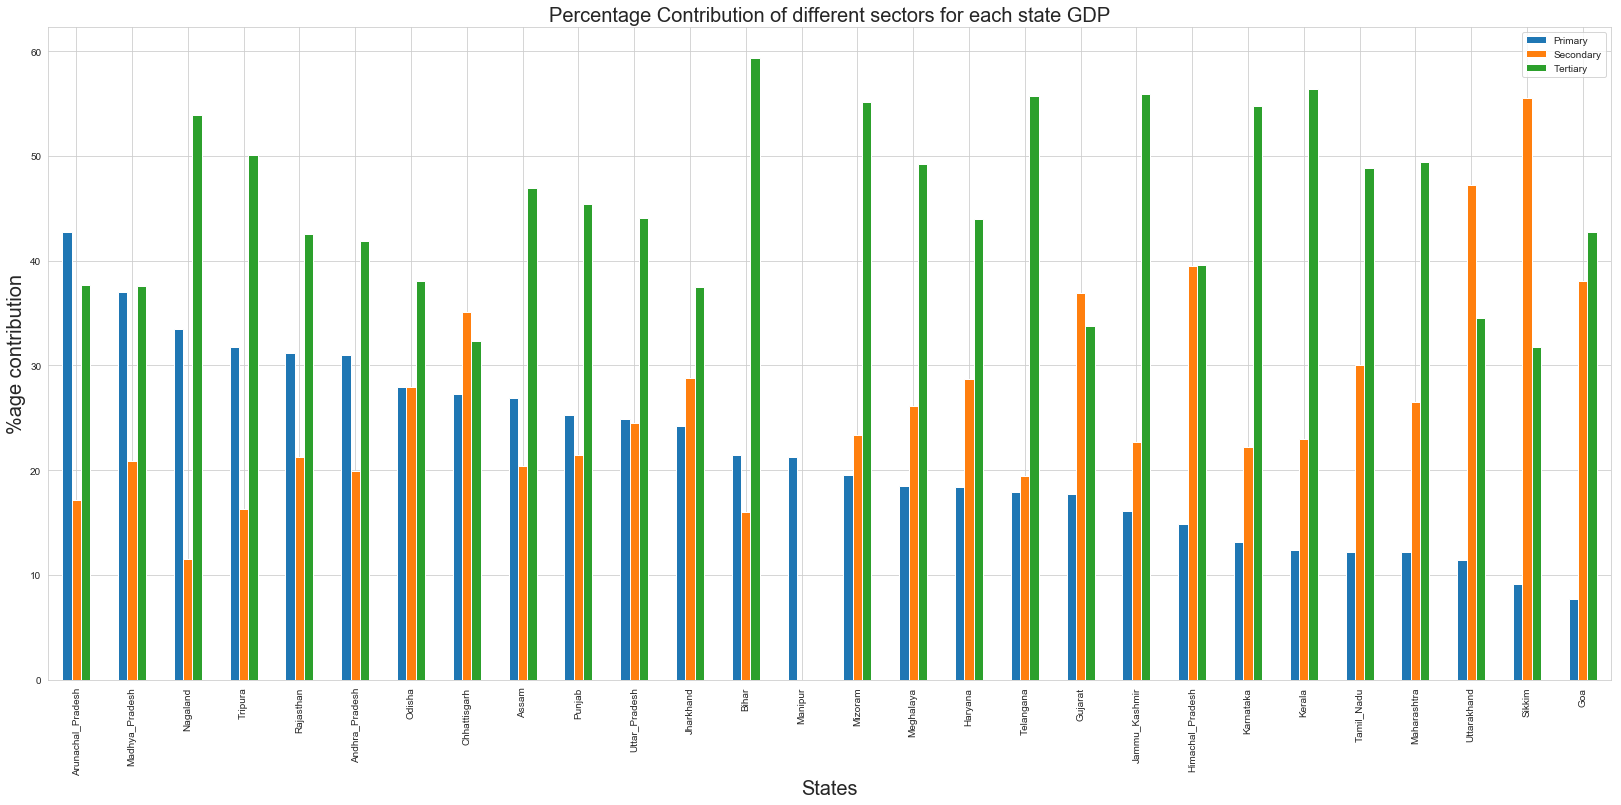

In [32]:
state_wise_contribution = state_wise_contribution.sort_values(by=['Primary', 'Secondary','Tertiary'], ascending=False)
state_wise_contribution.plot.bar(figsize=(28,12))
plt.title('Percentage Contribution of different sectors for each state GDP', fontsize=20)
plt.xlabel('States',fontsize=20)
plt.ylabel('%age contribution',fontsize=20)
plt.show()

# Task:

Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [33]:
#Checking quntile values for the dataset
p20, p50, p85, p1 = df_per_capita_gdp['Per Capita GDP'].quantile(0.20), df_per_capita_gdp['Per Capita GDP'].quantile(0.50), df_per_capita_gdp['Per Capita GDP'].quantile(0.85), df_per_capita_gdp['Per Capita GDP'].quantile(1)

#Create a function to check category of that state based on GDP per capita
def check_category(amount):
    if amount<=p20:
        cat='C4'
    elif (amount>p20) & (amount <= p50):
        cat='C3'
    elif (amount>p50) & (amount <= p85):
        cat='C2'
    elif (amount>p85) & (amount<=p1):
        cat='C1'
    return cat
state_cat_per_capita = df_per_capita_gdp.copy() #Fist creating backup of current dataset

#Now checking category details based on GDP per capita using above defined method
state_cat_per_capita['Category'] = state_cat_per_capita['Per Capita GDP'].apply(lambda x: check_category(x))
state_cat_per_capita = state_cat_per_capita.sort_values(by='Per Capita GDP', ascending=False)
print(state_cat_per_capita.head())

         State  Per Capita GDP Category
0          Goa        271793.0       C1
1       Sikkim        240274.0       C1
2      Haryana        164077.0       C1
3       Kerala        154778.0       C1
4  Uttarakhand        153076.0       C1


To find out each sector contribution in total GDP

In [34]:
sub_cat_data = state_df[['State','Sub-Category','2014-15','Sectors']]
sub_cat_data_req_cat = sub_cat_data.loc[sub_cat_data['Sectors']!='others']


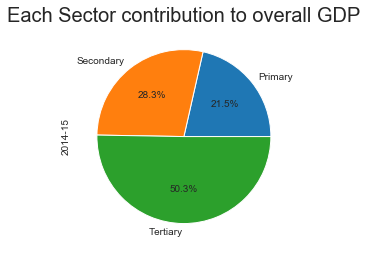

In [35]:
sec_gdp_contribution = sub_cat_data_req_cat.copy()
sec_gdp_contribution.groupby('Sectors')['2014-15'].sum().plot(kind='pie', autopct='%.1f%%')
plt.title('Each Sector contribution to overall GDP', fontsize=20)
plt.show()

# Task:
Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

In [36]:
sec_gdp_contribution_cat = sub_cat_data.copy() #Creating a backup of master dataframe
#Creating a function to check each state category on the basis of state name from Dataframe - state_cat_per_capita,
# as a part of previous task.
def check_state_cat(v_state):
    return state_cat_per_capita.loc[state_cat_per_capita['State'] == v_state, 'Category'].iloc[0]

#Now using above method, I am creating a new column called Category which will hold category of that state
sec_gdp_contribution_cat['Category'] = sec_gdp_contribution_cat['State'].apply(lambda x:check_state_cat(x))
#Dropping unnecessary columns
sec_gdp_contribution_cat.drop(['State','Sectors'],axis=1, inplace=True) 
#create a list of unnecessary columns which can be removed from dataframe
remove_rows =['TOTAL GSVA at basic prices', \
              'Per Capita GSDP (Rs.)', 'Population (\'00)', 'Taxes on Products', 'Subsidies on products']
print(sec_gdp_contribution_cat.head())

                                        Sub-Category     2014-15 Category
0                  Agriculture, forestry and fishing  14819416.0       C2
1                               Mining and quarrying   1484300.0       C2
2                                      Manufacturing   4672266.0       C2
3  Electricity, gas, water supply & other utility...   1151729.0       C2
4                                       Construction   4664889.0       C2


In [37]:
#Removing unnecessary Rows
sec_gdp_contribution_cat = sec_gdp_contribution_cat.loc[~sec_gdp_contribution_cat['Sub-Category'].isin(remove_rows)]
print(sec_gdp_contribution_cat.head(20))

                                         Sub-Category     2014-15 Category
0                   Agriculture, forestry and fishing  14819416.0       C2
1                                Mining and quarrying   1484300.0       C2
2                                       Manufacturing   4672266.0       C2
3   Electricity, gas, water supply & other utility...   1151729.0       C2
4                                        Construction   4664889.0       C2
5               Trade, repair, hotels and restaurants   4233400.0       C2
6   Transport, storage, communication & services r...   5076984.0       C2
7                                  Financial services   1900863.0       C2
8   Real estate, ownership of dwelling & professio...   4405409.0       C2
9                               Public administration   2200897.0       C2
10                                     Other services   4215389.0       C2
14                       Gross State Domestic Product  52646842.0       C2
17                  Agric

In [38]:
cat_subcat_contribution = sec_gdp_contribution_cat.groupby(['Category','Sub-Category'])['2014-15'].sum()
cat_subcat_contribution = cat_subcat_contribution.unstack(level=0)
print(cat_subcat_contribution)

Category                                                     C1           C2  \
Sub-Category                                                                   
Agriculture, forestry and fishing                    15993232.0   88427015.0   
Construction                                         12607184.0   43975718.0   
Electricity, gas, water supply & other utility ...    2434878.0   14541227.0   
Financial services                                    4321519.0   37812475.0   
Gross State Domestic Product                        118129206.0  622828765.0   
Manufacturing                                        19625045.0  108002544.0   
Mining and quarrying                                   833510.0   11613097.0   
Other services                                        9042352.0   39486616.0   
Public administration                                 4150701.0   20189303.0   
Real estate, ownership of dwelling & profession...   15571552.0   95695548.0   
Trade, repair, hotels and restaurants   

In [39]:
#Creating different Dataframe for data of each category and created a new column under each category
# which represents contribution of that sub-sector for that state's GDP

c1_data = pd.DataFrame(cat_subcat_contribution['C1']).sort_values(by='C1', ascending=False) 
c1_data['Cont'] = 100*(c1_data['C1']/c1_data['C1'].iloc[0])
c1_data.drop('Gross State Domestic Product', axis=0,inplace=True)    
c1_data = c1_data.reset_index(drop=False)
print(c1_data,'\n')

c2_data = pd.DataFrame(cat_subcat_contribution['C2']).sort_values(by='C2', ascending=False)
c2_data['Cont'] = 100*(c2_data['C2']/c2_data['C2'].iloc[0])
c2_data.drop('Gross State Domestic Product', axis=0,inplace=True)
c2_data = c2_data.reset_index(drop=False)
print(c2_data,'\n')

c3_data = pd.DataFrame(cat_subcat_contribution['C3']).sort_values(by='C3', ascending=False)
c3_data['Cont'] = 100*(c3_data['C3']/c3_data['C3'].iloc[0])
c3_data.drop('Gross State Domestic Product', axis=0,inplace=True)
c3_data = c3_data.reset_index(drop=False)
print(c3_data,'\n')

c4_data = pd.DataFrame(cat_subcat_contribution['C4']).sort_values(by='C4', ascending=False)
c4_data['Cont'] = 100*(c4_data['C4']/c4_data['C4'].iloc[0])
c4_data.drop('Gross State Domestic Product', axis=0,inplace=True)
c4_data = c4_data.reset_index(drop=False)
print(c4_data,'\n')

                                         Sub-Category          C1       Cont
0                                       Manufacturing  19625045.0  16.613203
1                   Agriculture, forestry and fishing  15993232.0  13.538762
2               Trade, repair, hotels and restaurants  15738265.0  13.322925
3   Real estate, ownership of dwelling & professio...  15571552.0  13.181797
4                                        Construction  12607184.0  10.672368
5                                      Other services   9042352.0   7.654629
6   Transport, storage, communication & services r...   7885253.0   6.675109
7                                  Financial services   4321519.0   3.658299
8                               Public administration   4150701.0   3.513696
9   Electricity, gas, water supply & other utility...   2434878.0   2.061199
10                               Mining and quarrying    833510.0   0.705592 

                                         Sub-Category           C2       C

In [40]:
#Printing Top Sectors of each Category
print('Top Sub-sectors of C1 category are:\n'+'\n'.join(c1_data.loc[0:6,'Sub-Category'].values)+'\nand contribute:' + str(round(np.sum(c1_data.loc[0:6,'Cont']),2))+'%\n')
print('Top Sub-sectors of C2 category are:\n'+'\n'.join(c2_data.loc[0:7,'Sub-Category'].values)+'\nand contribute:' + str(round(np.sum(c2_data.loc[0:7,'Cont']),2))+'%\n')
print('Top Sub-sectors of C3 category are:\n'+'\n'.join(c3_data.loc[0:7,'Sub-Category'].values)+'\nand contribute:' + str(round(np.sum(c3_data.loc[0:7,'Cont']),2))+'%\n')
print('Top Sub-sectors of C4 category are:\n'+'\n'.join(c4_data.loc[0:7,'Sub-Category'].values)+'\nand contribute:' + str(round(np.sum(c4_data.loc[0:6,'Cont']),2))+'%\n')

Top Sub-sectors of C1 category are:
Manufacturing
Agriculture, forestry and fishing
Trade, repair, hotels and restaurants
Real estate, ownership of dwelling & professional services
Construction
Other services
Transport, storage, communication & services related to broadcasting
and contribute:81.66%

Top Sub-sectors of C2 category are:
Manufacturing
Real estate, ownership of dwelling & professional services
Agriculture, forestry and fishing
Trade, repair, hotels and restaurants
Construction
Other services
Financial services
Transport, storage, communication & services related to broadcasting
and contribute:82.67%

Top Sub-sectors of C3 category are:
Agriculture, forestry and fishing
Manufacturing
Trade, repair, hotels and restaurants
Real estate, ownership of dwelling & professional services
Construction
Other services
Mining and quarrying
Transport, storage, communication & services related to broadcasting
and contribute:83.44%

Top Sub-sectors of C4 category are:
Agriculture, forestry

# Task:
Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  

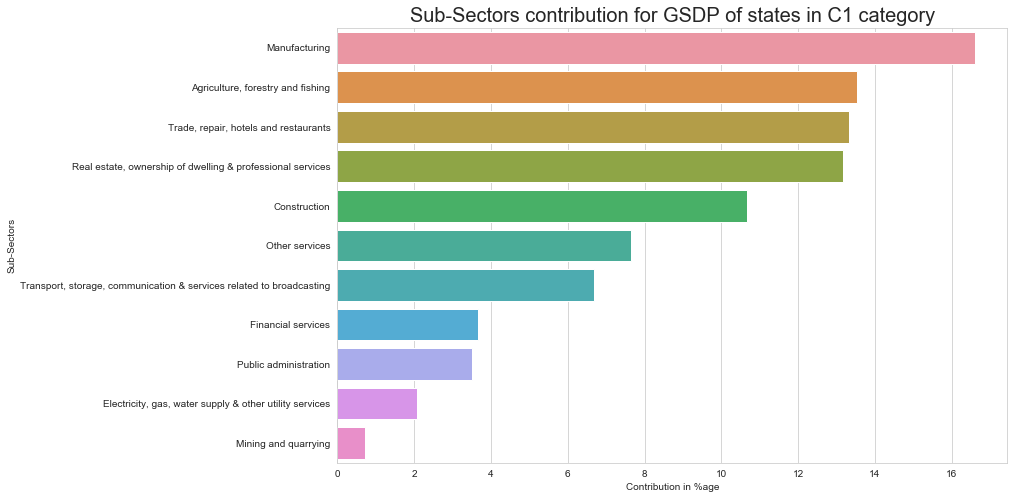

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cont',y='Sub-Category',data=c1_data)
plt.title('Sub-Sectors contribution for GSDP of states in C1 category', fontsize=20)
plt.xlabel('Contribution in %age')
plt.ylabel('Sub-Sectors')
plt.show()

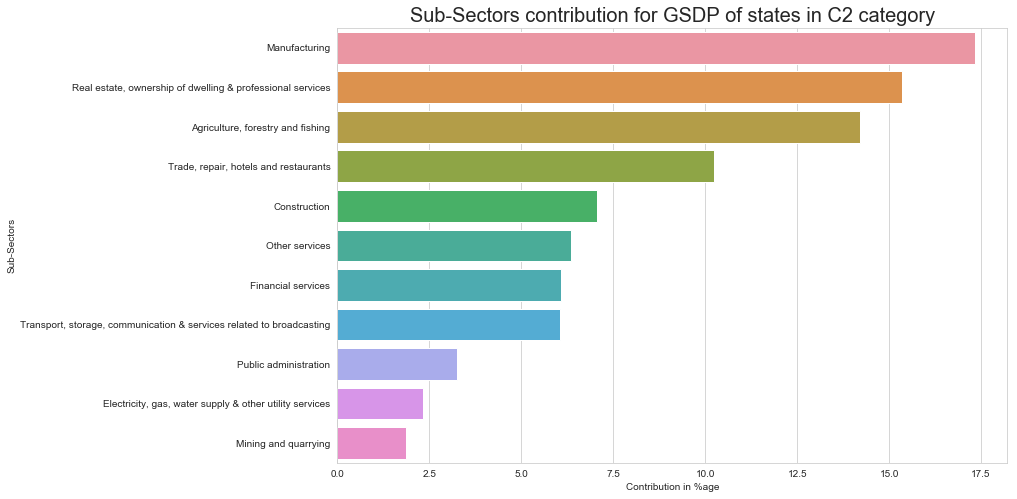

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cont',y='Sub-Category',data=c2_data)
plt.title('Sub-Sectors contribution for GSDP of states in C2 category', fontsize=20)
plt.xlabel('Contribution in %age')
plt.ylabel('Sub-Sectors')
plt.show()

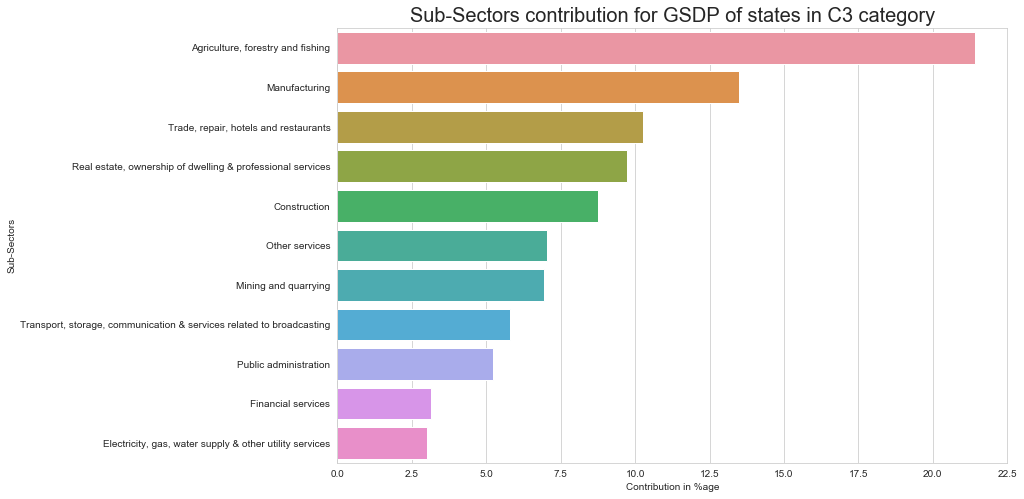

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cont',y='Sub-Category',data=c3_data)
plt.title('Sub-Sectors contribution for GSDP of states in C3 category', fontsize=20)
plt.xlabel('Contribution in %age')
plt.ylabel('Sub-Sectors')
plt.show()

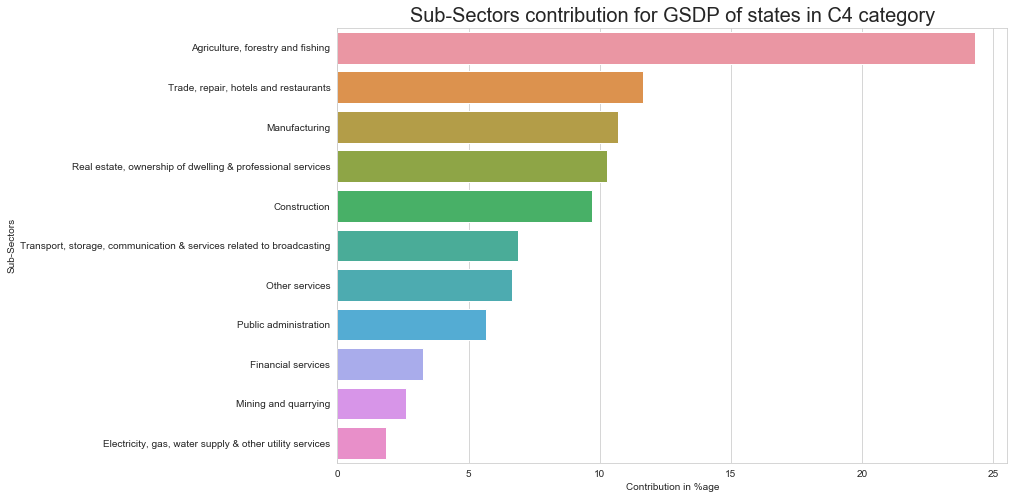

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cont',y='Sub-Category',data=c4_data)
plt.title('Sub-Sectors contribution for GSDP of states in C4 category', fontsize=20)
plt.xlabel('Contribution in %age')
plt.ylabel('Sub-Sectors')
plt.show()

# Task:
Now that you have summarised the data in the form of plots, tables, etc., try to draw non-obvious insights from it. Think about questions such as:


# How does the GDP distribution of the top states (C1) differ from the others?

- I found that for the states of C1 category, all top sub-sectors are almost contributing at the same level. Their contibution is somewhere between 11% to 14%.
But the same is not true for other categories.
This implies states of C1 category focuses on all aspects of economy.
Also I found that major contributor in C1 category's states are sub-sectors of Tertiary sectors.

# Which sub-sectors seem to be correlated with high GDP?

- I found that sub-sector - 'Real estate, ownership of dwelling & professional services' seems to be correlatedwith High GDP as it is highest contributor in C1 category.
And the value has been going less while moving from C1 to C4.

# Which sub-sectors do the various categories need to focus on? and Finally, provide at least two recommendations for each category to improve the per capita GDP.

- Despite being the highest GSDP, C1 categories states should focus on below sub-sectrors to improve GDP per capita:
    Utility Services,
    Financial Services,
    Public administration,
    Storage and transportation services

- For C2 Category:
    Major contributor sub-sector in this category is manufacturing. But if we see the contribution of other sub-sectors, some of tem are contributing between 1 to 6%.
    So states should focus on below sub-sectors to improve their per capita GDP.
    Mining and quarrying
    Utility Services
    Transport, Storage and communication services
    Public administartion

- For C3 Category: In this category, states should focus on
    `Manufacturing` and `Mining` sectors as it will induce industry growth and industry revolution is the next phase of development for C3.

- C4 Category: Here, states should focus on: `Trade`, `Manufacturing` and `Construction` as infrastructure is important for growth at preliminary stages. 
        Also more focus can be given to improve techniques for `Agriculture` and `Crops` as they form basis for C4. 
    

# Part-II: GDP and Education

In [46]:
#Importing the dataset
dropout_rate_df = pd.read_csv(r"C:\Users\vpapn\Documents\mydocs\Assignment\GDP analysis\rs_session243_au570_1.1.csv")

#Taking data of only 2014-15 and keeping only required columns
#Here I found that there are 2 columns with same name - Primary - 2014-2015
#I am assuming that second column with name Primary - 2014-2015 will solve our purpose
#as after analyzig file level data, I found that first column should be corresponding to year 2013-14.

dropout_rate_2014_15_df = dropout_rate_df[['Level of Education - State', 'Primary - 2014-2015.1', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']]
dropout_rate_2014_15_df.rename(columns={'Level of Education - State':'State', 'Primary - 2014-2015.1' : 'Primary', 'Upper Primary - 2014-2015':'Upper Primary', 'Secondary - 2014-2015':'Secondary'},inplace=True)
print('Infomation of dropped rate dataset is:\n',dropout_rate_2014_15_df.info())
print('Sample records:\n', dropout_rate_2014_15_df.head())
print('Shape of the dataframe is:\n',dropout_rate_2014_15_df.shape)

print(dropout_rate_2014_15_df.isna().all(axis=0))#There are no rows with all values as NULL
#Checking if there are any rows with minimum 1 NUll value
dropout_rate_2014_15_df[dropout_rate_2014_15_df.isna().sum(axis=1)>0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
State            37 non-null object
Primary          31 non-null float64
Upper Primary    35 non-null float64
Secondary        36 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB
Infomation of dropped rate dataset is:
 None
Sample records:
                State  Primary  Upper Primary  Secondary
0      A & N Islands     0.51           1.69       9.87
1     Andhra Pradesh     6.72           5.20      15.71
2  Arunachal Pradesh    10.82           6.71      17.11
3              Assam    15.36          10.51      27.06
4              Bihar      NaN           4.08      25.90
Shape of the dataframe is:
 (37, 4)
State            False
Primary          False
Upper Primary    False
Secondary        False
dtype: bool


,State,Primary,Upper Primary,Secondary
4,Bihar,NaN,4.08,25.900
5,Chandigarh,NaN,0.44,NaN
9,Delhi,NaN,0.76,11.810
17,Kerala,NaN,NaN,12.320
18,Lakshadweep,NaN,2.78,6.763
30,Tamil Nadu,NaN,NaN,8.100


Here I found that there are 6 states for which some data is missing. Out of which 3 are Union Territorries(Delhi, Chandigarh and Lakshadweep) that imploes we can drop that row
As they will not be considered for our analysis.

States for which either 1 or 2 rates are missing, I will drop those rows. As otherwise it will be difficult to 
correctly analyse the requirement.

In [48]:
dropout_rate_2014_15_df = dropout_rate_2014_15_df[dropout_rate_2014_15_df.isna().sum(axis=1)==0]
# Also we dont want last row which gives info about AllIndia 
dropout_rate_2014_15_df = dropout_rate_2014_15_df[dropout_rate_2014_15_df['State']!='All India']
print(dropout_rate_2014_15_df.shape)
dropout_rate_2014_15_df.info()
dropout_rate_2014_15_df.head(10)

(30, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 35
Data columns (total 4 columns):
State            30 non-null object
Primary          30 non-null float64
Upper Primary    30 non-null float64
Secondary        30 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


,State,Primary,Upper Primary,Secondary
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
6,Chhatisgarh,2.91,5.85,21.26
7,Dadra & Nagar Haveli,1.47,4.02,16.77
8,Daman & Diu,1.11,3.11,32.27
10,Goa,0.73,0.07,11.15
11,Gujarat,0.89,6.41,25.04
12,Haryana,5.61,5.81,15.89


# Task:
Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.

As now we need to check for GDP per capita for each state. Lets look at our clean dataset from Part1-b
df_per_capita_gdp - This is the dataframe we had created early for year 2014-15

In [50]:
print(df_per_capita_gdp)

                State  Per Capita GDP
0                 Goa        271793.0
1              Sikkim        240274.0
2             Haryana        164077.0
3              Kerala        154778.0
4         Uttarakhand        153076.0
5         Maharashtra        152853.0
6    Himachal_Pradesh        147330.0
7          Tamil_Nadu        146503.0
8           Karnataka        145141.0
9             Gujarat        141263.0
10          Telangana        139035.0
11             Punjab        126606.0
12  Arunachal_Pradesh        112718.0
13     Andhra_Pradesh        104977.0
14            Mizoram         97687.0
15           Nagaland         89607.0
16       Chhattisgarh         86860.0
17          Rajasthan         84837.0
18            Tripura         77358.0
19          Meghalaya         76228.0
20      Jammu_Kashmir         75840.0
21             Odisha         73979.0
22     Madhya_Pradesh         62989.0
23          Jharkhand         62091.0
24              Assam         60621.0
25          

I found that in dataset - df_per_capita_gdp, our state values are separated by '_' while state values are separated by space in 
 Dropout dataset. 
 Lets make droupout dataset in sync with other dataset.

In [52]:
dropout_rate_2014_15_df['State'] = dropout_rate_2014_15_df['State'].apply(lambda x:str.replace(x,' ','_'))
dropout_rate_2014_15_df

,State,Primary,Upper Primary,Secondary
0,A_&_N_Islands,0.51,1.69,9.87
1,Andhra_Pradesh,6.72,5.20,15.71
2,Arunachal_Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
6,Chhatisgarh,2.91,5.85,21.26
7,Dadra_&_Nagar_Haveli,1.47,4.02,16.77
8,Daman_&_Diu,1.11,3.11,32.27
10,Goa,0.73,0.07,11.15
11,Gujarat,0.89,6.41,25.04
12,Haryana,5.61,5.81,15.89


In [111]:
#Now inner merge both the data sets as we are interested only for those states for which data is available in both dataframes.

In [53]:
corr_metric = pd.merge(dropout_rate_2014_15_df, df_per_capita_gdp, on=['State'])

corr_metric.set_index('State')

,Primary,Upper Primary,Secondary,Per Capita GDP
State,,,,
Andhra_Pradesh,6.72,5.20,15.71,104977.0
Arunachal_Pradesh,10.82,6.71,17.11,112718.0
Assam,15.36,10.51,27.06,60621.0
Goa,0.73,0.07,11.15,271793.0
Gujarat,0.89,6.41,25.04,141263.0
Haryana,5.61,5.81,15.89,164077.0
Himachal_Pradesh,0.64,0.87,6.07,147330.0
Jharkhand,5.48,8.99,24.00,62091.0
Karnataka,2.02,3.85,26.18,145141.0


In [55]:
print('Correlation of GDP per capita with dropout rates in Primay Education: ',round(corr_metric['Primary'].corr(corr_metric['Per Capita GDP']),3))

Correlation of GDP per capita with dropout rates in Primay Education:  -0.574


In [56]:
print('Correlation of GDP per capita with dropout rates in Upper Primay Education: ',round(corr_metric['Upper Primary'].corr(corr_metric['Per Capita GDP']),3))

Correlation of GDP per capita with dropout rates in Upper Primay Education:  -0.56


In [57]:
print('Correlation of GDP per capita with dropout rates in Secondary Education: ',round(corr_metric['Secondary'].corr(corr_metric['Per Capita GDP']),3))

Correlation of GDP per capita with dropout rates in Secondary Education:  -0.377


In [58]:
print(corr_metric.corr())

                 Primary  Upper Primary  Secondary  Per Capita GDP
Primary         1.000000       0.648542   0.167977       -0.574049
Upper Primary   0.648542       1.000000   0.540504       -0.559976
Secondary       0.167977       0.540504   1.000000       -0.376752
Per Capita GDP -0.574049      -0.559976  -0.376752        1.000000


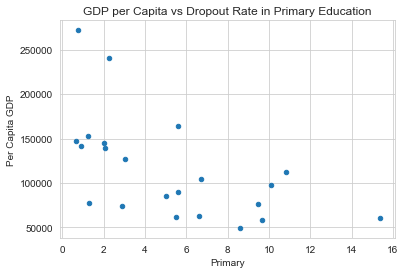

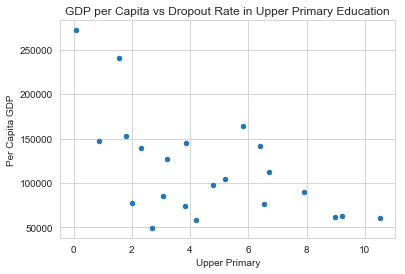

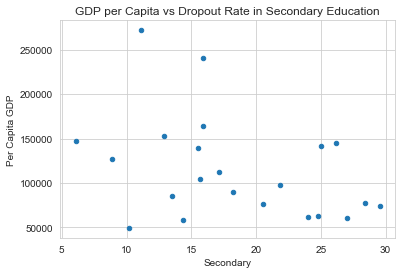

In [59]:
#Plot Per Capita GDP vs Education dropout rate at each education level

corr_metric.plot.scatter(x='Primary', y = 'Per Capita GDP', title='GDP per Capita vs Dropout Rate in Primary Education')

corr_metric.plot.scatter(x='Upper Primary', y = 'Per Capita GDP' , title='GDP per Capita vs Dropout Rate in Upper Primary Education')

corr_metric.plot.scatter(x='Secondary', y = 'Per Capita GDP', title='GDP per Capita vs Dropout Rate in Secondary Education')
plt.show()

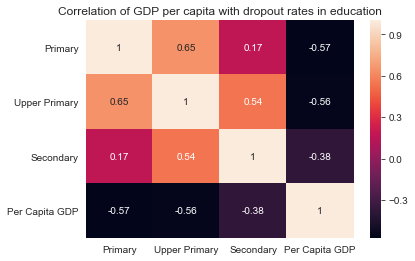

In [60]:
corr = corr_metric.corr()

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)
plt.title('Correlation of GDP per capita with dropout rates in education')
plt.show()

# Task:
Write down the key insights you draw from this data:
Form at least one reasonable hypothesis for the observations from the data.

1. Firstly, correlation metric is a metric where we try to find the pattern of increase/decrease of 1 datapoint with increase/decrease of other datatpont.
2. Correlation value between 2 datapoints can be from -1 to 1. The higher negative number reprsents negative relationship between both data points,
 and a higher positive number represents Positive relationship between them.

3. In our case, our aim was to find the impact of drop out rates during Primary, Upper Primary and Secondary Education on per capita GDP.
4. I found that, there is a negative impact of all 3 drop out rates (i.e. Primary: -0.57, Upper Primary: -0.56, Secondary:-0.38) on Per Capita GDP.
Means higher the drop rates in any of the education level, lesser the per capita GDP.
5. Also, I found that there is positive relationship between drop out rates on any of the education level.
Means if drop out rate is more in Primary Education, there are high chances that the raes will be higher on Upper Primary and secondary level.
